In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
sales=pd.read_csv("/content/supermarket_sales.csv")

In [ ]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
sales.shape

(1000, 17)

In [ ]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [ ]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [ ]:
sales['Time'] = pd.to_datetime(sales['Time'])

In [ ]:
sales['Hour'] = (sales['Time']).dt.hour

In [ ]:
sales['Hour'].nunique()

11

In [ ]:
sales['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12])

In [ ]:
categorical_columns = [cname for cname in sales.columns if sales[cname].dtype == "object"]

In [ ]:
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Date',
 'Payment']

In [ ]:
sales.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                               object
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
Hour                                int64
dtype: object

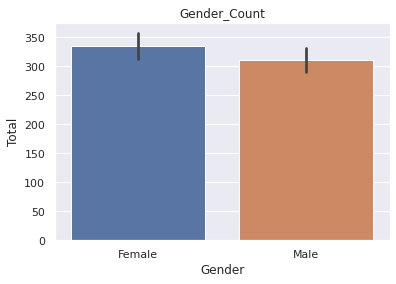

In [ ]:
sns.set(style="darkgrid")
sns.barplot(x="Gender",y="Total", data =sales)
plt.title("Gender_Count")
plt.show()

Conclusion : By plotting this graph we have founded  a  Gender Count, in this graph we can see that there are more female customer  in supermarket sales datasets.



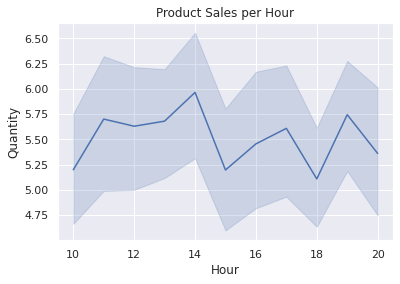

In [ ]:
sns.lineplot(x="Hour",  y = 'Quantity',data =sales)
plt.title("Product Sales per Hour")
plt.show()

Conclusion : Below we can see how each branch's sales quantity looks like by the hour in a monthly fashion

In [ ]:
sales.groupby(['Customer type']).agg({'Total':'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


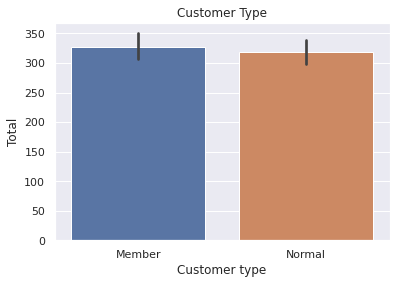

In [ ]:
sns.barplot(x='Customer type', y='Total', data =sales)
plt.title("Customer Type")
plt.show()

Conclusion: In this data of customer type there are more member customers than normal customers. Member customer means a member who is at the time of admission to membership a Customer and is so designated by the Board
Normal customer a person who purchases products or services from a person or business frequently



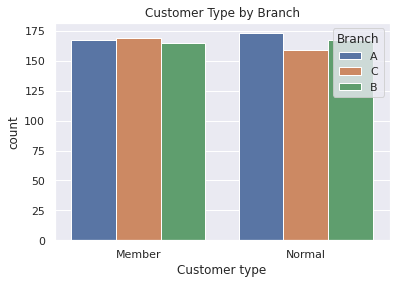

In [ ]:
sns.countplot(x="Customer type", hue = "Branch", data =sales)
plt.title("Customer Type by Branch")
plt.show()

Conclusion: Branch C  has more member customer and in branch A more normal customers.

In [ ]:
#Products Analysis

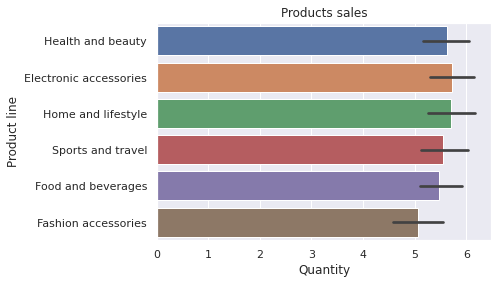

In [ ]:
sns.barplot(y = 'Product line',x='Quantity',data=sales)
plt.title("Products sales")
plt.show()


Conclusion : From the above visual, Health and Beauty ,Electronic accessories, Home and lifestyle, Sports and travel have a better average quantity sales that food and beverages as well as Fashion accessories.





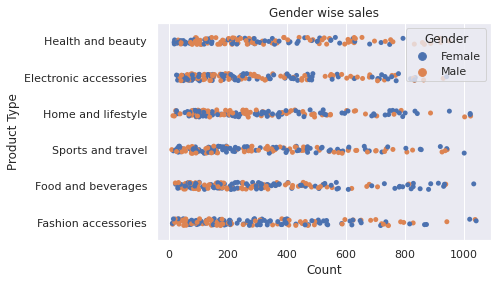

In [ ]:
sns.stripplot(y ='Product line',x= 'Total', hue = "Gender", data = sales)
plt.title("Gender wise sales")
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()


Conclusion : This graph shows the gender wise sales. In health and beauty there are more male customers than female customers. In fashion and accessories
there are more females than males, after that we can See that there are lower
number of customers in home and lifestyle in  both male and female category.   By visualising the we can see that more number of females customers are there.



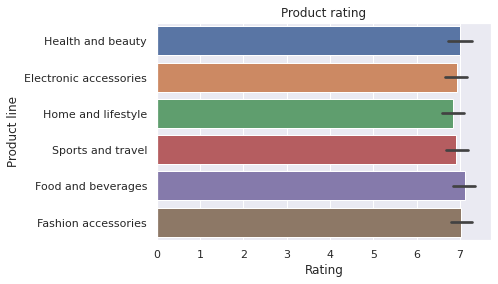

In [ ]:
sns.barplot(x='Rating', y='Product line', data =sales)
plt.title("Product rating")
plt.show()


Conclusion :  Food and Beverages have the highest average rating while sports and travel the lowest





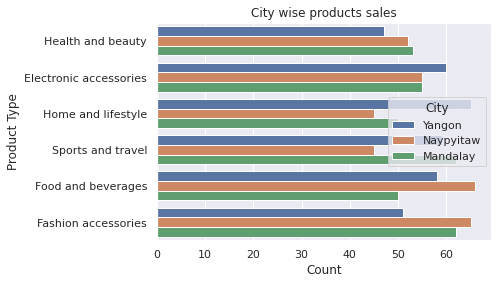

In [ ]:
sns.countplot(y ='Product line', hue = "City", data = sales)
plt.title("City wise products sales")
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

Conclusion : Well, Yangon leads at Home & Lifestyle and Electronic accessories.
Naypyitaw  leads at Food & Beverages and Fashion accessories.
Mandalay leads at Sports & Travel and Health & Beauty.





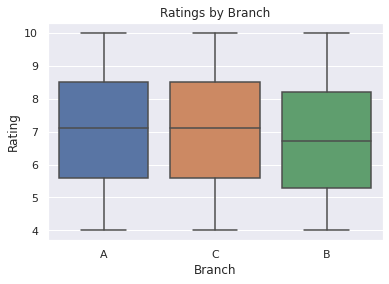

In [ ]:
sns.boxplot(x="Branch", y = "Rating" ,data =sales)
plt.title("Ratings by Branch")
plt.show()

Conclusion : In this boxplot there are three branches in different colours.
The highest rated branches are A and C, the B becomes the lowest rated branch. We have to work on branch B to get more ratings and profit.







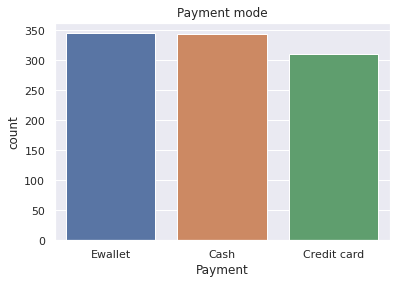

In [ ]:
sns.countplot(x="Payment", data =sales)
plt.title("Payment mode")
plt.show()

Conclusion: In this graph we found that most of the customer prefer to do payment through Ewallet. The second most is used is Cash payment,most low payments are done by Credit card. We  need to increase more Ewallet payments.




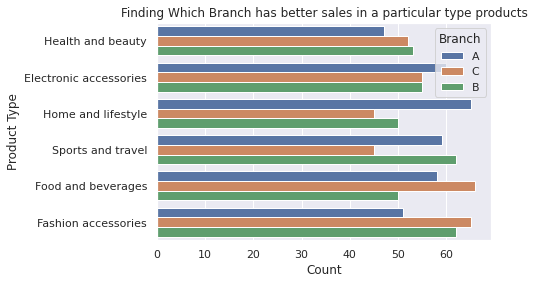

In [ ]:
sns.countplot(y ='Product line', hue = "Branch", data = sales)
plt.title("Finding Which Branch has better sales in a particular type products")
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

Conclusion: Branch A has more number of sale in electronic accessories and home and lifestyle.
Branch C has more number of sales in food and beverages and fashion and accessories.
Branch B has more number of sales in sports and travel and fashion and accessories and have less sales in other product type.


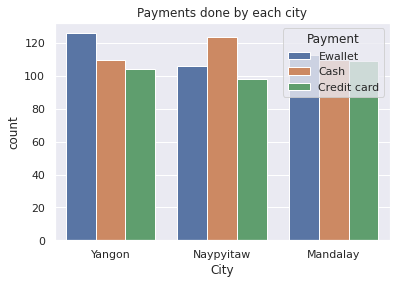

In [ ]:
sns.countplot(x ='City', hue = "Payment", data = sales)
plt.title("Payments done by each city")
plt.show()


Conclusion: In this graph we are getting to know that which payment mode customer prefer to pay each city. We can see that there is more usage of Ewallet in Yangon city. In  Naypyitaw city there is customers use more cash payment and in Mandalay city there customer  use of  Ewallat.